# EE5600 - Introduction to AI and ML - Homework-0

In [132]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [190]:
# Generate training samples
N = 10 # Number of training samples
# Generate equispaced floats in the interval [0, 2π]
x = np.linspace(0, 2*np.pi, N)
# Generate noise
mean = 0
std = 0.05
# Generate some numbers from the sine function
y = np.sin(x)
# Add noise
y += np.random.normal(mean, std, N)

# put column with ones for bias
x_train = np.array([np.ones(N), x])
# swap axes changes the above 2xN matrix to Nx2 matrix
x_train = np.swapaxes(x_train, 0,1)
# print(x_train.shape)

In [191]:
# Generate test inputs
N_test = 100 # size of test samples
x_test = np.linspace(0,2*np.pi, N_test) 
# mean and std of test inputs' noise
test_mean = 0
test_std = 0.05
x_test += np.random.normal(test_mean, test_std, N_test)
y_test = np.sin(x_test)

### Vanilla Linear Regression
model: y = w1*x + w0

In [192]:
# calculate weights that minimize the cost function 
def get_weights(X, y):
    w = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)), np.transpose(X)), y)
    return w

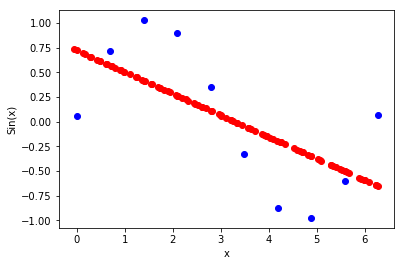

In [193]:
w = get_weights(x_train, y)
# print(w)
y_predicted = w[0] + w[1]*x_test   # y=mx+c

# plotting
plt.plot(x,y,'bo')
plt.plot(x_test, y_predicted, 'ro')
plt.xlabel('x')
plt.ylabel('Sin(x)')
plt.show()

###  Linear Regression using polynomial basis Function

In [180]:
# generate polynomial with training data
# polynomial on x of order M
def polynomial(X, _M):
    _phi_x = np.ones(len(X))
    for i in range(1, _M+1):
        _phi_x = np.c_[_phi_x, X**i]
    return _phi_x

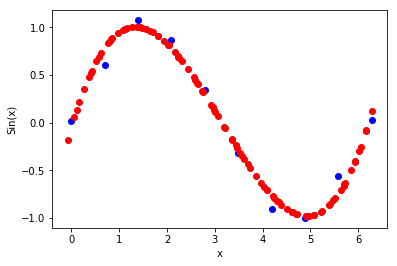

In [186]:
M = 3 # order of polynomial
x_train = polynomial(x, M)
# print(x_train.shape)
w1 = get_weights(x_train,y)
# print(w1)

y_predict = np.dot(polynomial(x_test, M), w1)
# plotting
plt.plot(x,y,'bo')
plt.plot(x_test, y_predict, 'ro')
plt.xlabel('x')
plt.ylabel('Sin(x)')
plt.show() 

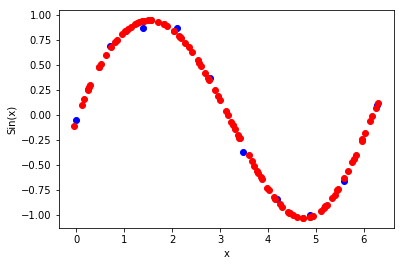

In [141]:
M = 6
x_train = polynomial(x, M)
# print(x_train.shape)
w1 = get_weights(x_train,y)
# print(w1)

y_predict = np.dot(polynomial(x_test, M), w1)
# plotting
plt.plot(x,y,'bo')
plt.plot(x_test, y_predict, 'ro')
plt.xlabel('x')
plt.ylabel('Sin(x)')
plt.show() 

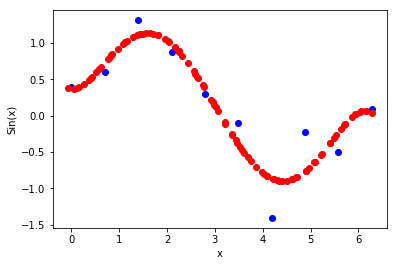

In [187]:
# plotted by taking training label noise std = 0.3
M = 5
x_train = polynomial(x, M)
# print(x_train.shape)
y = np.sin(x) + np.random.normal(0, 0.3, N)
w1 = get_weights(x_train,y)
# print(w1)15

y_predict = np.dot(polynomial(x_test, M), w1)
# plotting
plt.plot(x,y,'bo')
plt.plot(x_test, y_predict, 'ro')
plt.xlabel('x')
plt.ylabel('Sin(x)')
plt.show() 